Код переписан на Python 3.8.

Переделано с пакетов gdal на PIL

Статистические маски позволяют одновременно контролировать 4 параметра:
1) Величину перепада яркости;
2) Однороднодность объектов на границе;
3) Форму границы объекта;
4) Ширину границы объектов.


In [1]:
# Маски, растры
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
from pylab import *

# Работа с изображением
from PIL import Image

# Режим отображения внутри ноутбука
%matplotlib inline   

# Размер картинок
plt.rcParams['figure.figsize'] = (12, 12)

gray()

<Figure size 864x864 with 0 Axes>

In [2]:
# Статистические маски обнаружения границ вертикальной и горизонтальной ориентации

mask0 = np.array([[  1, 0, 0, 0, 0, 0, 0, 0, 2],
                  [  1, 1, 0, 0, 0, 0, 0, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 0, 0, 0, 0, 0, 2, 2],
                  [  1, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=np.uint8)

mask90 = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  0, 1, 1, 1, 1, 1, 1, 1, 0],
                  [  0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [  0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [  0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [  0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [  0, 0, 2, 2, 2, 2, 2, 0, 0],
                  [  0, 2, 2, 2, 2, 2, 2, 2, 0],
                  [  2, 2, 2, 2, 2, 2, 2, 2, 2]], dtype=np.uint8)

mask45 = np.array([[ 1, 1, 1, 1, 1, 0, 0, 0, 0],
                  [  1, 1, 1, 1, 1, 0, 0, 0, 0],
                  [  1, 1, 1, 1, 0, 0, 0, 0, 0],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 0, 0, 0, 0, 0, 2, 2],
                  [  0, 0, 0, 0, 0, 0, 2, 2, 2],
                  [  0, 0, 0, 0, 0, 2, 2, 2, 2],
                  [  0, 0, 0, 0, 2, 2, 2, 2, 2],
                  [  0, 0, 0, 0, 2, 2, 2, 2, 2]], dtype=np.uint8)

mask135= np.array([[ 0, 0, 0, 0, 1, 1, 1, 1, 1],
                  [  0, 0, 0, 0, 1, 1, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 1, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  2, 2, 0, 0, 0, 0, 0, 1, 1],
                  [  2, 2, 2, 0, 0, 0, 0, 0, 0],
                  [  2, 2, 2, 2, 0, 0, 0, 0, 0],
                  [  2, 2, 2, 2, 2, 0, 0, 0, 0],
                  [  2, 2, 2, 2, 2, 0, 0, 0, 0]], dtype=np.uint8)


print (mask0)
print (' ') 
print (mask90)
print (' ') 
print (mask45)
print (' ')
print (mask135)

[[1 0 0 0 0 0 0 0 2]
 [1 1 0 0 0 0 0 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 0 0 0 0 0 2 2]
 [1 0 0 0 0 0 0 0 2]]
 
[[1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 0 0]
 [0 2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2 2]]
 
[[1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 2 2 2]
 [0 0 0 0 0 2 2 2 2]
 [0 0 0 0 2 2 2 2 2]
 [0 0 0 0 2 2 2 2 2]]
 
[[0 0 0 0 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [2 2 0 0 0 0 0 1 1]
 [2 2 2 0 0 0 0 0 0]
 [2 2 2 2 0 0 0 0 0]
 [2 2 2 2 2 0 0 0 0]
 [2 2 2 2 2 0 0 0 0]]


In [3]:
# Статистические маски обнаружения углов |`` и |_

mask_lu = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  1, 1, 1, 1, 1, 1, 0, 0, 0],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 0, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 0, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 0, 0, 0, 0, 2, 2, 2]], dtype=np.uint8)

mask_lb = np.array([[1, 1, 0, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 0, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 0, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 1, 0, 0, 0, 0, 0, 0],
                  [  1, 1, 1, 1, 1, 1, 0, 0, 0],
                  [  1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=np.uint8)

mask_ru = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  0, 0, 0, 1, 1, 1, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  2, 2, 2, 0, 0, 0, 0, 1, 1],
                  [  2, 2, 2, 0, 0, 0, 0, 1, 1],
                  [  2, 2, 2, 0, 0, 0, 0, 1, 1]], dtype=np.uint8)

mask_rb = np.array([[2, 2, 2, 0, 0, 0, 0, 1, 1],
                  [  2, 2, 2, 0, 0, 0, 0, 1, 1],
                  [  2, 2, 2, 0, 0, 0, 0, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  0, 0, 0, 0, 0, 0, 1, 1, 1],
                  [  0, 0, 0, 1, 1, 1, 1, 1, 1],
                  [  1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=np.uint8)

print (mask_lu)
print (' ') 
print (mask_lb)
print (' ') 
print (mask_ru)
print (' ') 
print (mask_rb)

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]]
 
[[1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
 
[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [2 2 2 0 0 0 0 1 1]
 [2 2 2 0 0 0 0 1 1]
 [2 2 2 0 0 0 0 1 1]]
 
[[2 2 2 0 0 0 0 1 1]
 [2 2 2 0 0 0 0 1 1]
 [2 2 2 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


In [6]:
# Подсчет кол-ва элементов маски с заданным значением

def count_mask_elem(mask, val):
    counter = 0.0
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j] == val:
                counter +=1.0
    return counter


In [7]:
# Бинаризация изображения статистической маской

def image_mask_rer2(image, mask, b_por, sg_por, dbg_prnt=0):
    edge_image=np.zeros((image.shape[0], image.shape[1]), dtype=np.ubyte)
    elem_cnt1=count_mask_elem(mask, 1) 
    elem_cnt2=count_mask_elem(mask, 2)
    sh= int(mask.shape[0]/2)
    if  dbg_prnt == 1:
        print ('edge_image.shape[0], edge_image.shape[1]: ', edge_image.shape[0], edge_image.shape[1])    
        print ('elem_cnt1: ', elem_cnt1, 'type(elem_cnt1): ', type(elem_cnt1))
        print ('elem_cnt2: ', elem_cnt2, 'type(elem_cnt2): ', type(elem_cnt2))
        print ('sh: ', sh, 'type(sh): ', type(sh))
        print ('image.shape[0] - mask.shape[0]: ', image.shape[0] - mask.shape[0])
        print ('image.shape[1] - mask.shape[1]: ', image.shape[1] - mask.shape[1])
    for r in range(image.shape[0] - mask.shape[0]):
        for c in range(image.shape[1] - mask.shape[1]):
            pixel_res=0
            m1=0.0
            m2=0.0
            sg1=0.0
            sg2=0.0
            for i in range(mask.shape[0]):
                for j in range(mask.shape[1]):
                    if mask[i, j] == 1:
                        m1 = m1 + image[r+i, c+j]
                        sg1 = sg1 + float(image[r+i, c+j]) * float(image[r+i, c+j])
                    if mask[i, j] == 2:
                        m2 = m2 + image[r+i, c+j]
                        sg2 = sg2 + float(image[r+i, c+j]) * float(image[r+i, c+j])
            m1 = m1/elem_cnt1
            m2 = m2/elem_cnt2
            sg1=(sg1/elem_cnt1-m1*m1) ** 0.5
            sg2=(sg2/elem_cnt2-m2*m2) ** 0.5
            if abs(m1-m2)>b_por and sg1 < sg_por and sg2 < sg_por:
                pixel_res = 200
            edge_image[r+sh, c+sh] = pixel_res
    return edge_image


# Бинаризация изображения списком статистических масок
def image_mask_rer3(image, mask_list, b_por, sg_por, dbg_prnt=0):
    edge_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.ubyte)
    for mask in mask_list:
        elem_cnt1 = count_mask_elem(mask, 1)
        elem_cnt2 = count_mask_elem(mask, 2)
        sh = int(mask.shape[0]/2)
        if  dbg_prnt == 1:
            print ('edge_image.shape[0], edge_image.shape[1]: ', edge_image.shape[0], edge_image.shape[1])
            print ('mask:', mask)
            print ('elem_cnt1: ', elem_cnt1, 'type(elem_cnt1): ', type(elem_cnt1))
            print ('elem_cnt2: ', elem_cnt2, 'type(elem_cnt2): ', type(elem_cnt2))
            print ('sh: ', sh, 'type(sh): ', type(sh))
            print ('image.shape[0] - mask.shape[0]: ', image.shape[0] - mask.shape[0])
            print ('image.shape[1] - mask.shape[1]: ', image.shape[1] - mask.shape[1])
        for r in range(image.shape[0] - mask.shape[0]):
            for c in range(image.shape[1] - mask.shape[1]):
                pixel_res=0
                m1 = 0.0
                m2 = 0.0
                sg1 = 0.0
                sg2 = 0.0
                for i in range(mask.shape[0]):
                    for j in range(mask.shape[1]):
                        if mask[i, j] == 1:
                            m1 = m1 + image[r+i, c+j]
                            sg1 = sg1 + float(image[r+i, c+j]) * float(image[r+i, c+j])
                        if mask[i, j] == 2:
                            m2 = m2 + image[r+i, c+j]
                            sg2 = sg2 + float(image[r+i, c+j]) * float(image[r+i, c+j])
                m1 = m1/elem_cnt1
                m2 = m2/elem_cnt2
                sg1 = (sg1/elem_cnt1-m1*m1) ** 0.5
                sg2 = (sg2/elem_cnt2-m2*m2) ** 0.5
                if abs(m1-m2)>b_por and sg1 < sg_por and sg2 < sg_por:
                    edge_image[r+sh, c+sh] = 200
    return edge_image


In [8]:
# Имя файла изображения для анализа 
img_file_name = u'D:\\KADR\\11.bmp'

# Параметры работы диффиринцирующих масок

# Значение перепада яркости
b_por = 30

# Допустимая неоднородность объектов
sg_por = 6

Размер маски (9, 9)
Размер изображения  (780, 780)
Wall time: 393 ms


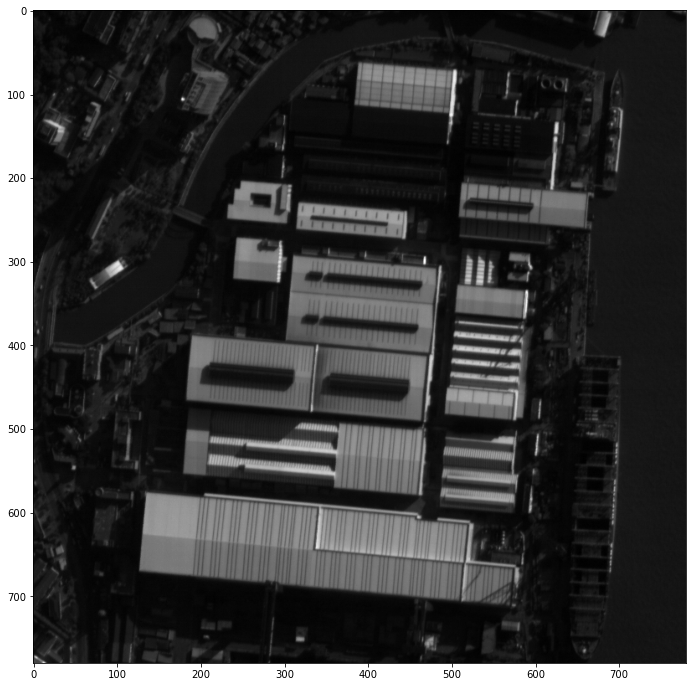

In [9]:
%%time

img = Image.open(img_file_name)

image_band_1 = array(img)

imgplot = plt.imshow(image_band_1)

print ('Размер маски', mask0.shape)
print ('Размер изображения ', image_band_1.shape)


[[1 0 0 0 0 0 0 0 2]
 [1 1 0 0 0 0 0 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 0 0 0 0 0 2 2]
 [1 0 0 0 0 0 0 0 2]]
Wall time: 2min 8s


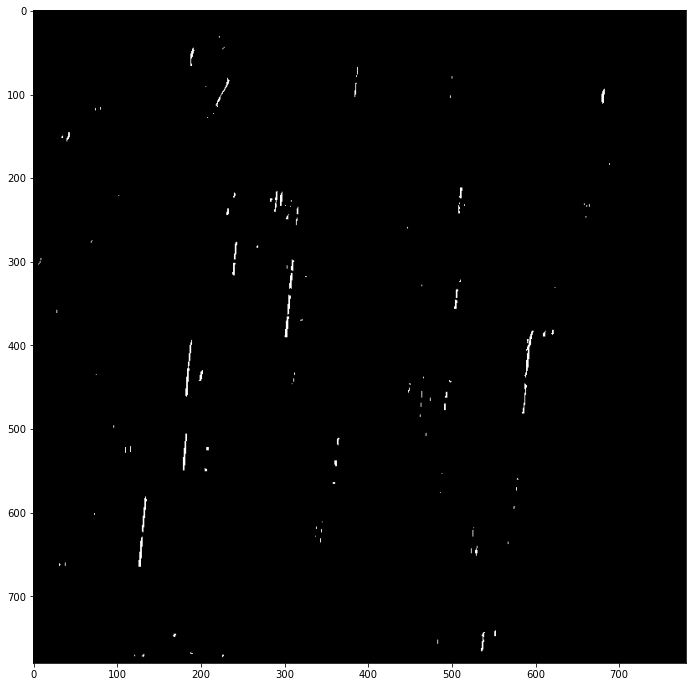

In [10]:
%%time

# блок T2 c коротким кодом вертикальной маски

print (mask0) 

edge_image_rastr0 = image_mask_rer2(image_band_1, mask0, b_por, sg_por)

plt.imshow(edge_image_rastr0)


[[1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 0 0]
 [0 2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2 2]]


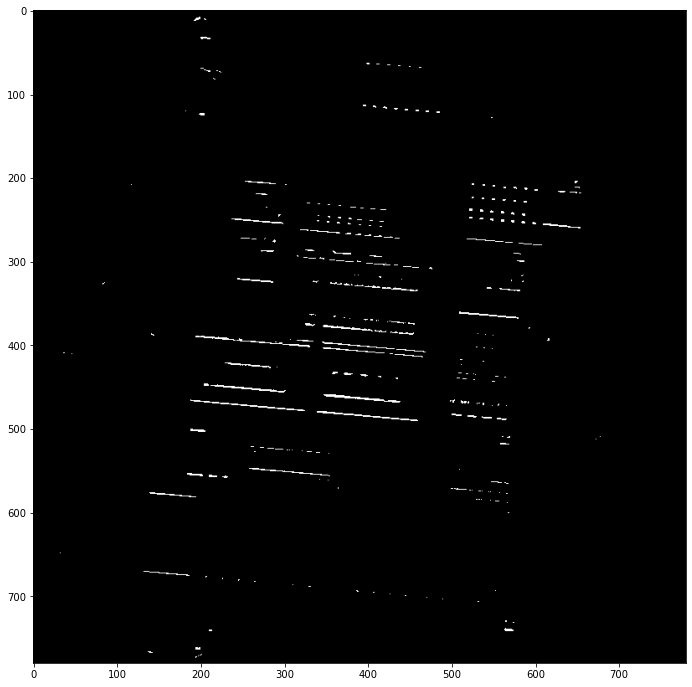

In [11]:
# блок T2 c коротким кодом горизонтальной маски

print (mask90) 

edge_image_rastr1 = image_mask_rer2(image_band_1, mask90, b_por, sg_por)

plt.imshow(edge_image_rastr1)


In [12]:
# Объединение изобраений по и, или
# Аналогичного результата возможно добиться модификацией image_mask_rer2 с подачей на вход списка двух масок 
# и формирования выходного изображения по объединенному условию

def image_join_and(image1, image2):
    join_image=np.zeros((image1.shape[0], image1.shape[1]), dtype=np.ubyte)
    for r in range(image1.shape[0]):
        for c in range(image1.shape[1]):           
            if image1[r, c] > 0 and image2[r, c] > 0 :
                pixel_res = 200
            else:
                pixel_res = 0
            join_image[r, c] = pixel_res
    return join_image

def image_join_or(image1, image2):
    join_image=np.zeros((image1.shape[0], image1.shape[1]), dtype=np.ubyte)
    for r in range(image1.shape[0]):
        for c in range(image1.shape[1]):           
            if image1[r, c] > 0 or image2[r, c] > 0 :
                pixel_res = 200
            else:
                pixel_res = 0
            join_image[r, c] = pixel_res
    return join_image

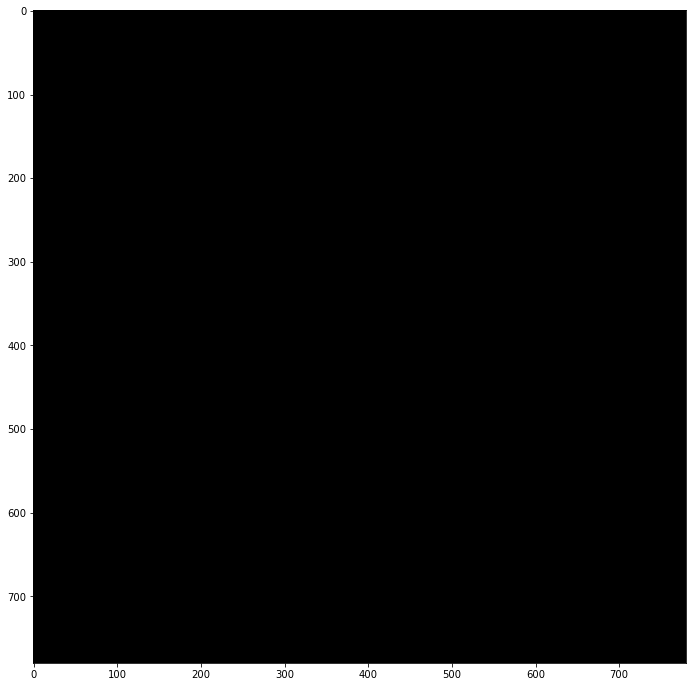

In [11]:
# Объединение изображний по и

image_and= image_join_and(edge_image_rastr0, edge_image_rastr1)

imgplot = plt.imshow(image_and)

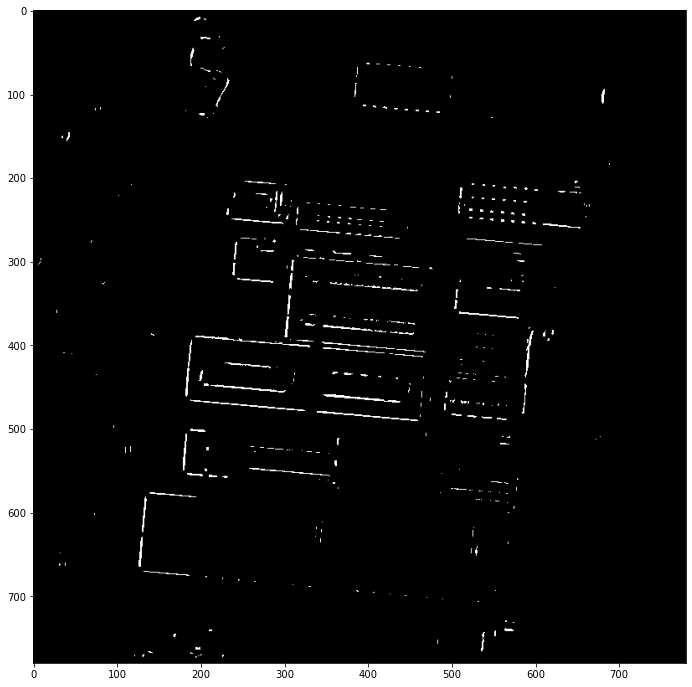

In [13]:
# Объединение изображний по или

image_or_line = image_join_or(edge_image_rastr0, edge_image_rastr1)

imgplot = plt.imshow(image_or_line)

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]]
Wall time: 2min 13s


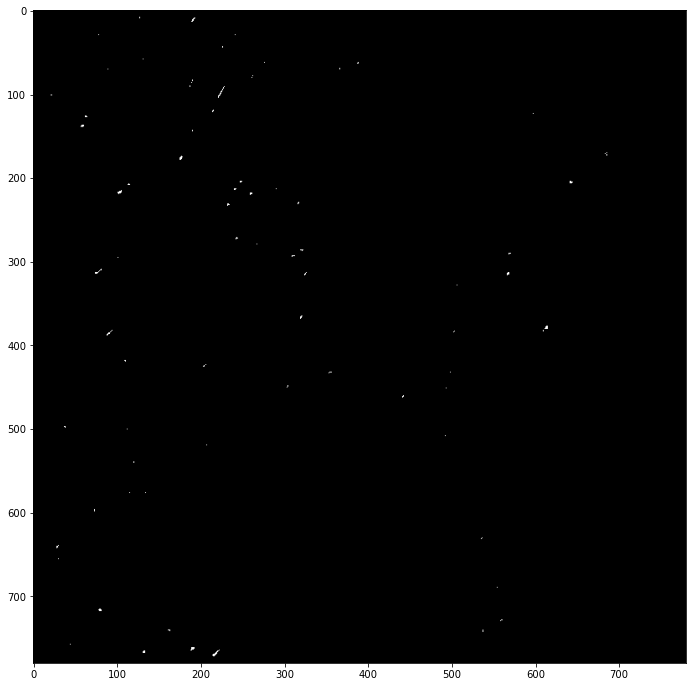

In [14]:
%%time

# блок T2 c коротким кодом маски левого верхнего угла

print (mask_lu) 

edge_image_rastr_lu = image_mask_rer2(image_band_1, mask_lu, b_por, sg_por)

plt.imshow(edge_image_rastr_lu)


[[1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]
 [1 1 0 0 0 0 2 2 2]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


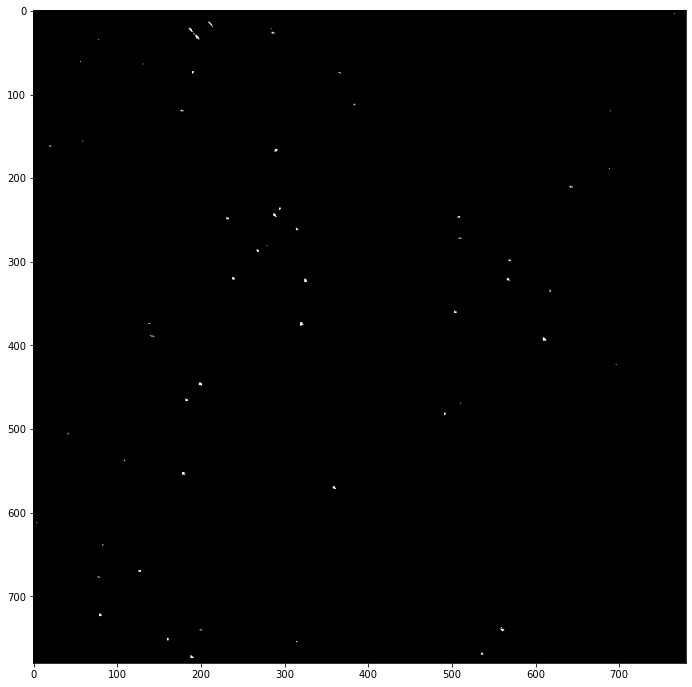

In [15]:
# блок T2 c коротким кодом маски левого нижнего угла

print (mask_lb) 

edge_image_rastr_lb = image_mask_rer2(image_band_1, mask_lb, b_por, sg_por)

plt.imshow(edge_image_rastr_lb)


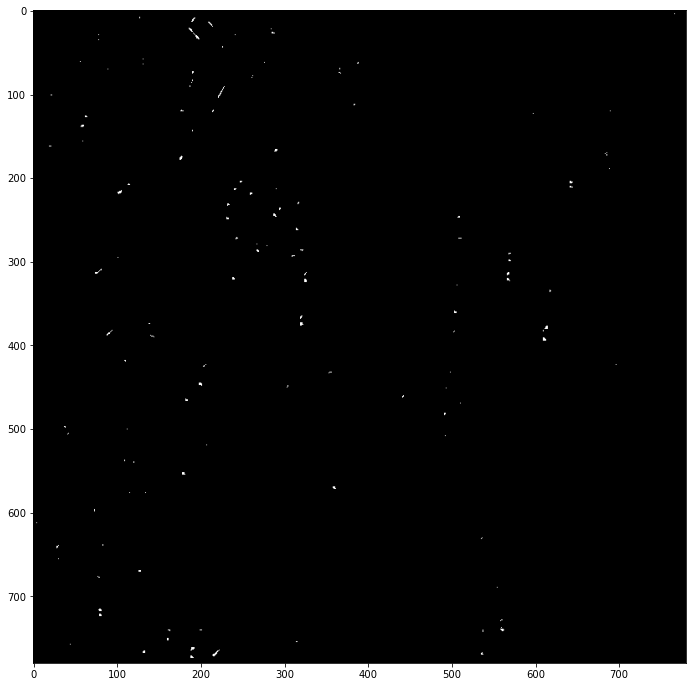

In [16]:
# Объединение изображний по или

image_or_u = image_join_or(edge_image_rastr_lu, edge_image_rastr_lb)

imgplot = plt.imshow(image_or_u)

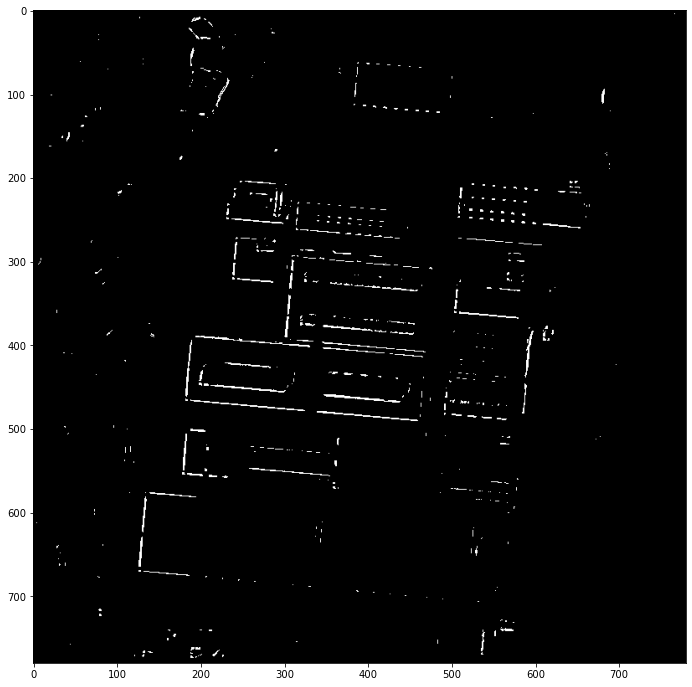

In [17]:
image_or = image_join_or(image_or_line, image_or_u)

imgplot = plt.imshow(image_or)

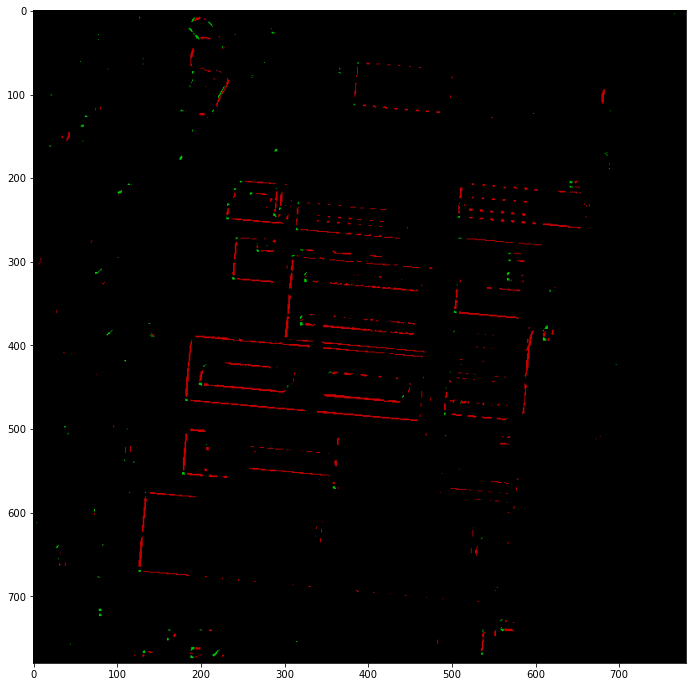

In [18]:
# Формирование цветного изображения для сравнения работы масок

def image_join_col(image1, image2):
    join_image=np.zeros((image1.shape[0], image1.shape[1], 3), dtype=np.ubyte)
    for r in range(image1.shape[0]):
        for c in range(image1.shape[1]):           
            join_image[r, c, 0] = image1[r, c];
            join_image[r, c, 1] = image2[r, c];
    return join_image

# Формирование цветного изображения на основе базового для сравнения работы масок
def image_join_col2(base_image, image_r, image_g):
    join_image=np.zeros((base_image.shape[0], base_image.shape[1], 3), dtype=np.ubyte)
    for r in range(base_image.shape[0]):
        for c in range(base_image.shape[1]):
            join_image[r, c, 0] = base_image[r, c]
            join_image[r, c, 1] = base_image[r, c]
            join_image[r, c, 2] = base_image[r, c]
            if image_r[r, c] != 0:
                join_image[r, c, 0] = image_r[r, c]
            if image_g[r, c] != 0:
                join_image[r, c, 1] = image_g[r, c]
    return join_image

image_col = image_join_col(image_or_line, image_or_u)

imgplot = plt.imshow(image_col)

Wall time: 8min 29s


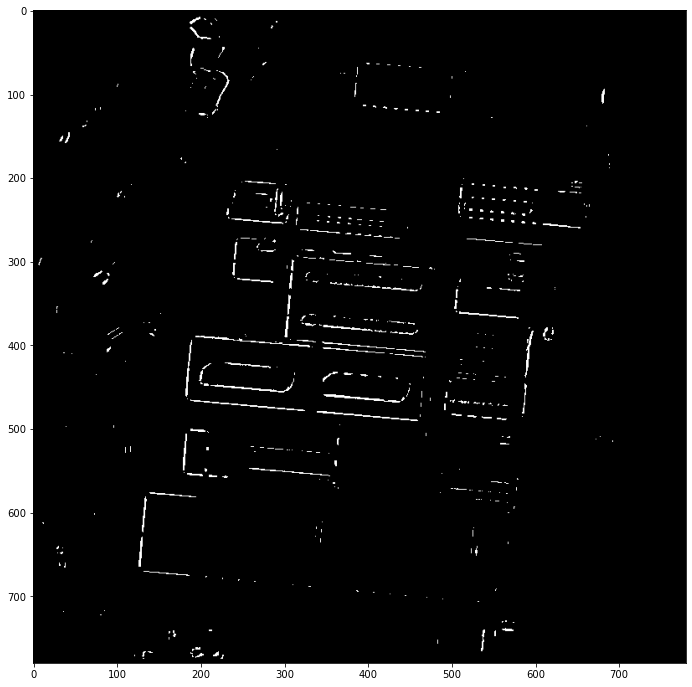

In [19]:
%%time

###############################################################################
# Переход на image_mask_rer3
###############################################################################

masks_line = [mask0 , mask90, mask45, mask135]

edge_image_rastr_line = image_mask_rer3(image_band_1, masks_line, b_por, sg_por)

plt.imshow(edge_image_rastr_line)

Wall time: 8min 41s


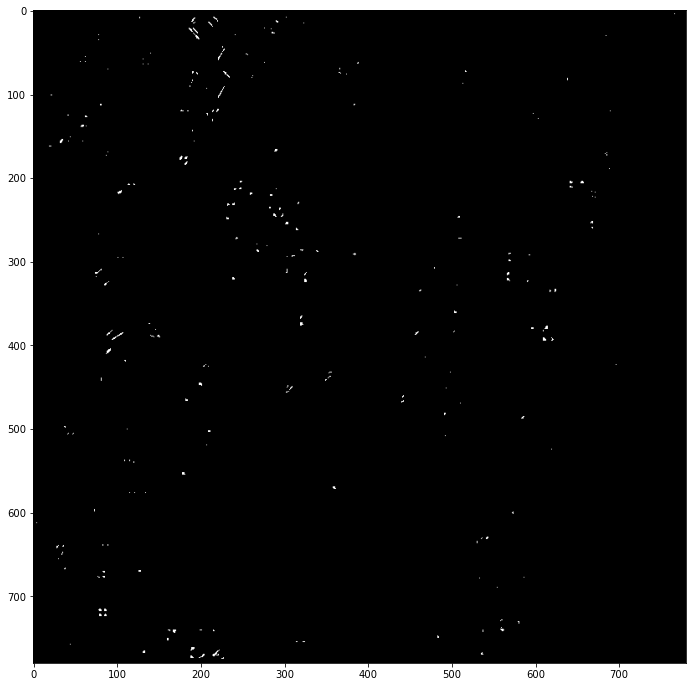

In [20]:
%%time

masks_corner = [mask_lu , mask_lb, mask_ru, mask_rb]

edge_image_rastr_corner = image_mask_rer3(image_band_1, masks_corner, b_por, sg_por)

plt.imshow(edge_image_rastr_corner)

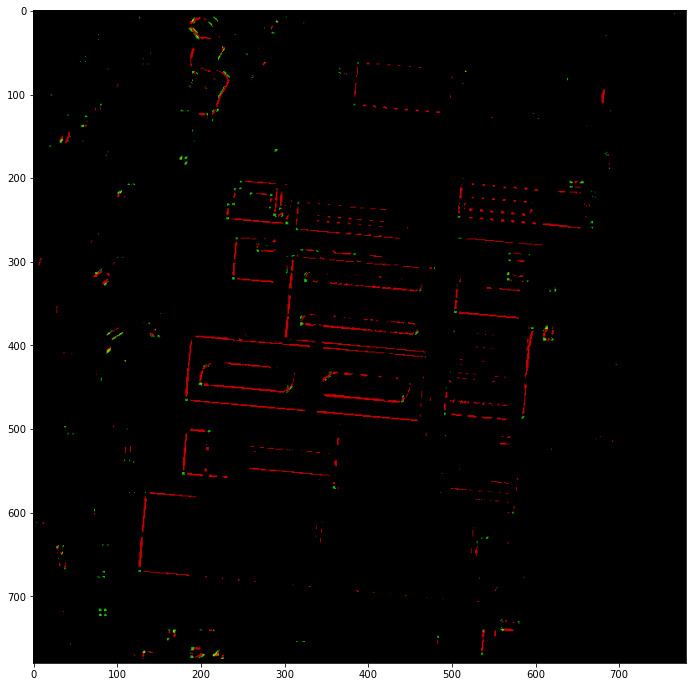

In [21]:
image_join2 = image_join_col(edge_image_rastr_line, edge_image_rastr_corner)

imgplot = plt.imshow(image_join2)

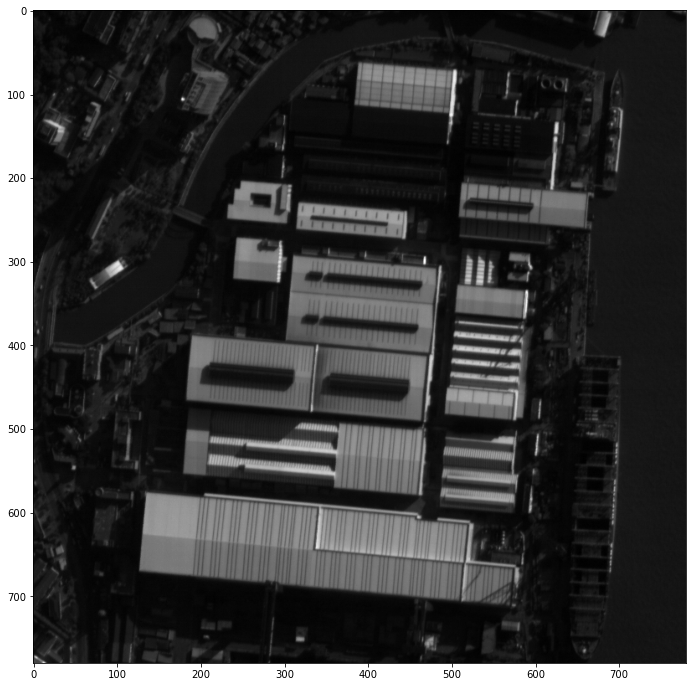

In [21]:
imgplot = plt.imshow(image_band_1)

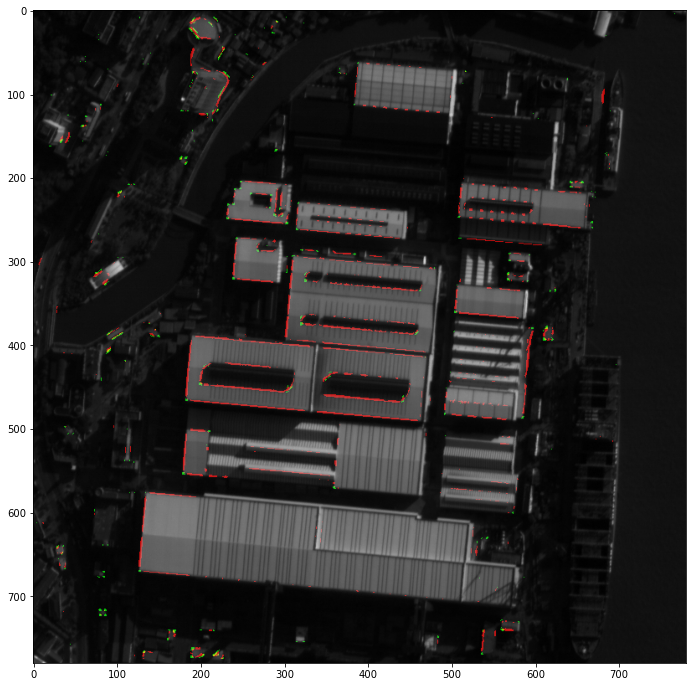

In [22]:
image_join3 = image_join_col2(image_band_1, edge_image_rastr_line, edge_image_rastr_corner)

imgplot = plt.imshow(image_join3)